Best theta: 74.77°, Calculated alpha1: 60.03°


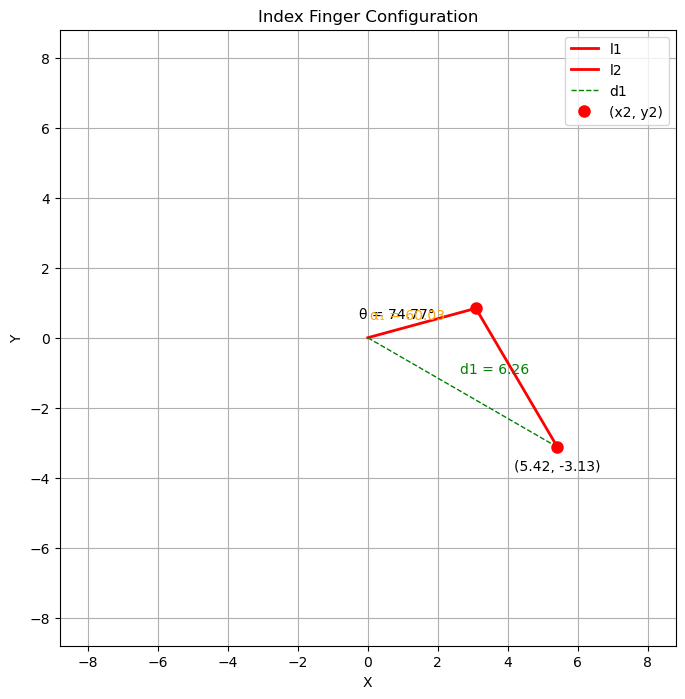

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def simulate_index_finger(l1, l2, alpha1):
    """
    Simulates the index finger and returns results, including x1, y1.
    """
    theta_values = np.linspace(0, 180, 1000)
    phi1_values = []
    d1_values = []
    alpha1_calculated_values = []
    x_joint_values = []
    y_joint_values = []
    x_end_values = []
    y_end_values = []

    for theta in theta_values:
        theta_rad = np.radians(theta)

        x_joint = l1 * np.sin(theta_rad)
        y_joint = l1 * np.cos(theta_rad)
        x_end = x_joint + l2 * np.sin(2 * theta_rad)
        y_end = y_joint + l2 * np.cos(2 * theta_rad)

        d1 = np.sqrt(x_end**2 + y_end**2)
        phi1 = 180 - theta

        # Calculate the angle of d1 with respect to the positive x-axis
        angle_d1_rad = np.arctan2(x_end, y_end)

        # Calculate alpha1 as the angle with the positive y-axis (vertical)
        alpha1_calculated_rad = np.pi - angle_d1_rad
        alpha1_calculated = np.degrees(alpha1_calculated_rad)

        phi1_values.append(phi1)
        d1_values.append(d1)
        alpha1_calculated_values.append(alpha1_calculated)
        x_joint_values.append(x_joint)
        y_joint_values.append(y_joint)
        x_end_values.append(x_end)
        y_end_values.append(y_end)

    return {
        'theta': theta_values,
        'phi1': phi1_values,
        'd1': d1_values,
        'alpha1_calculated': np.array(alpha1_calculated_values),
        'x_joint': np.array(x_joint_values),
        'y_joint': np.array(y_joint_values),
        'x_end': np.array(x_end_values),
        'y_end': np.array(y_end_values)
    }


def plot_index_finger_with_alpha(l1, l2, alpha1_known):
    """Plots the index finger simulation results with alpha1, d1, and phi1."""

    index_results = simulate_index_finger(l1, l2, alpha1_known)
    best_theta_index = np.argmin(np.abs(index_results['alpha1_calculated'] - alpha1_known))
    best_theta = index_results['theta'][best_theta_index]
    best_alpha1_calculated = index_results['alpha1_calculated'][best_theta_index]
    x_joint_best = index_results['x_joint'][best_theta_index]
    y_joint_best = index_results['y_joint'][best_theta_index]
    x_end_best = index_results['x_end'][best_theta_index]
    y_end_best = index_results['y_end'][best_theta_index]
    d1_best = index_results['d1'][best_theta_index]
    phi1_best = index_results['phi1'][best_theta_index]

    print(f"Best theta: {best_theta:.2f}°, Calculated alpha1: {best_alpha1_calculated:.2f}°")

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot links
    ax.plot([0, x_joint_best], [0, y_joint_best], 'r-', linewidth=2, label='l1')
    ax.plot([x_joint_best, x_end_best], [y_joint_best, y_end_best], 'r-', linewidth=2, label='l2')

    # Plot d1
    ax.plot([0, x_end_best], [0, y_end_best], 'g--', linewidth=1, label='d1')
    d1_label_x = x_end_best / 1.5
    d1_label_y = y_end_best / 3.5
    ax.text(d1_label_x, d1_label_y, f'd1 = {d1_best:.2f}', ha='center', va='center', color='green')

    # Plot joint and end point
    ax.plot(x_joint_best, y_joint_best, 'ro', markersize=8)
    ax.plot(x_end_best, y_end_best, 'ro', markersize=8, label='(x2, y2)')
    ax.text(x_end_best, y_end_best/0.85, f'({x_end_best:.2f}, {y_end_best:.2f})', ha='center', va='center')

    # Label theta
    theta_rad = np.radians(best_theta)
    theta_label_x = (l1 / 2) * np.sin(theta_rad) * 0.8
    theta_label_y = (l1 / 2) * np.cos(theta_rad) * 0.8
    ax.text(theta_label_x/1.5, theta_label_y/0.5, f'θ = {best_theta:.2f}°', ha='center', va='center')
    theta_arc = patches.Arc((0, 0), 0.8 * l1, 0.8 * l1, theta1=90, theta2=90 - best_theta, color='orange', linestyle='-', linewidth=1)

    # Draw alpha1 arc and label
    alpha1_rad = np.radians(best_alpha1_calculated)
    alpha1_arc_radius = np.sqrt(x_end_best**2 + y_end_best**2) * 0.3
    alpha1_arc = patches.Arc((0, 0), 2 * alpha1_arc_radius, 2 * alpha1_arc_radius,
                             theta1=90, theta2=90 - best_alpha1_calculated,
                             color='orange', linestyle='-', linewidth=1)

    alpha1_label_angle = (90 + (90 - best_alpha1_calculated)) / 2
    alpha1_label_radius = alpha1_arc_radius * 1.2
    alpha1_label_x = alpha1_label_radius * np.cos(np.radians(alpha1_label_angle))
    alpha1_label_y = alpha1_label_radius * np.sin(np.radians(alpha1_label_angle))
    ax.text(alpha1_label_x, alpha1_label_y/3, f'α₁ = {best_alpha1_calculated:.2f}', ha='center', va='center', color='orange')


    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Index Finger Configuration')
    ax.legend()
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim([-l1 - l2 - 1, l1 + l2 + 1])
    ax.set_ylim([-l1 - l2 - 1, l1 + l2 + 1])
    plt.show()

# Example usage:
l1 = 3.2
l2 = 4.6
alpha1_known = 60

plot_index_finger_with_alpha(l1, l2, alpha1_known)

Best theta: 85.64°, Calculated alpha1: 53.54°


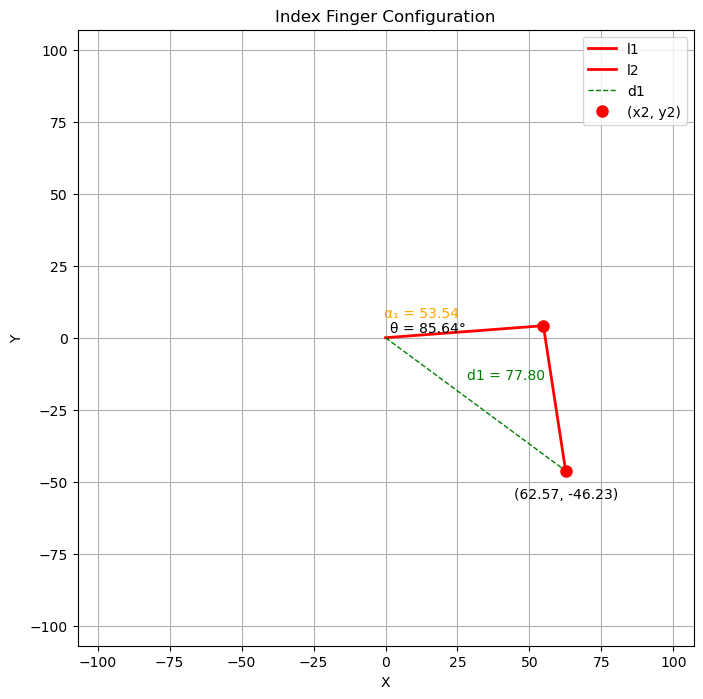

In [13]:
l1 = 55
l2 = 51
alpha1_known = 53.6

plot_index_finger_with_alpha(l1, l2, alpha1_known)

Target (x, y): (7.80, 0.00)
Calculated Theta: 55.72°
Calculated Alpha1: 91.01°
Reached (x, y): (6.93, 0.12)


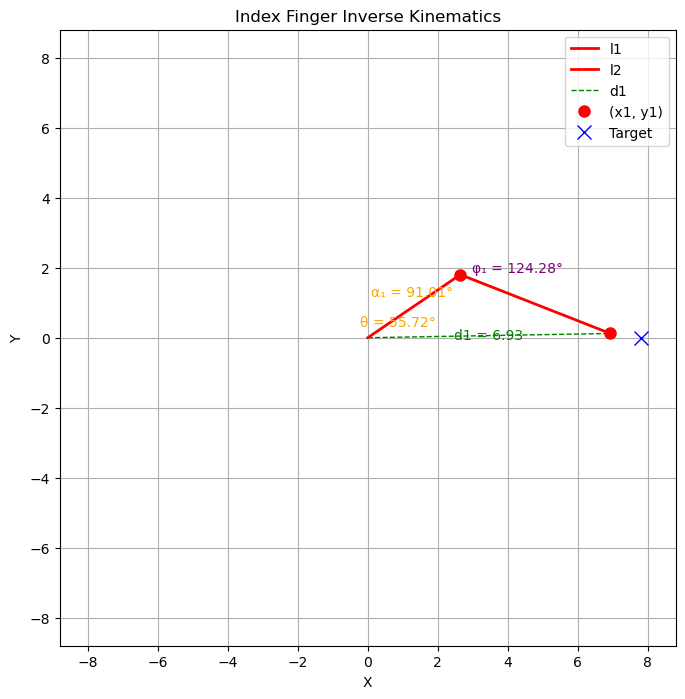

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import matplotlib.patches as patches

def calculate_endpoint(theta, l1, l2):
    """Calculates the (x, y) endpoint for a given theta."""
    theta_rad = np.radians(theta)
    x = l1 * np.sin(theta_rad) + l2 * np.sin(2 * theta_rad)
    y = l1 * np.cos(theta_rad) + l2 * np.cos(2 * theta_rad)
    return x, y

def calculate_alpha1(x, y):
    """Calculates alpha1 (degrees) from the endpoint coordinates."""
    angle_rad = np.arctan2(x, y)
    # alpha1_rad = np.pi/2 - angle_rad
    alpha1_rad = np.pi - angle_rad
    return np.degrees(alpha1_rad)

def error_function(theta, l1, l2, x_target, y_target):
    """Error function to minimize."""
    x_calc, y_calc = calculate_endpoint(theta[0], l1, l2)
    return (x_target - x_calc)**2 + (y_target - y_calc)**2

def solve_inverse_kinematics(l1, l2, x_target, y_target):
    """Solves for theta that reaches the target (x, y)."""
    initial_guess = [90]  # Start with a reasonable guess for theta
    result = optimize.fmin(error_function, initial_guess, args=(l1, l2, x_target, y_target), disp=False)
    best_theta = result[0]
    x_final, y_final = calculate_endpoint(best_theta, l1, l2)
    alpha1_final = calculate_alpha1(x_final, y_final)
    return best_theta, alpha1_final, x_final, y_final

def error_function_x(theta, l1, l2, x_target):
    """Error function to minimize for a target x."""
    x_calc, _ = calculate_endpoint(theta[0], l1, l2)
    return (x_target - x_calc)**2

def solve_for_x(l1, l2, x_target):
    """Solves for theta that achieves the target x."""
    initial_guess = [90]
    result = optimize.fmin(error_function_x, initial_guess, args=(l1, l2, x_target), disp=False)
    best_theta = result[0]
    x_final, y_final = calculate_endpoint(best_theta, l1, l2)
    alpha1_final = calculate_alpha1(x_final, y_final)
    return best_theta, alpha1_final, x_final, y_final

def error_function_y(theta, l1, l2, y_target):
    """Error function to minimize for a target y."""
    _, y_calc = calculate_endpoint(theta[0], l1, l2)
    return (y_target - y_calc)**2

def solve_for_y(l1, l2, y_target):
    """Solves for theta that achieves the target y."""
    initial_guess = [90]
    result = optimize.fmin(error_function_y, initial_guess, args=(l1, l2, y_target), disp=False)
    best_theta = result[0]
    x_final, y_final = calculate_endpoint(best_theta, l1, l2)
    alpha1_final = calculate_alpha1(x_final, y_final)
    return best_theta, alpha1_final, x_final, y_final

def plot_finger_configuration(l1, l2, theta, alpha1, x_end, y_end, x_target=None, y_target=None):
    """Plots the finger configuration."""
    x_joint = l1 * np.sin(np.radians(theta))
    y_joint = l1 * np.cos(np.radians(theta))

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot links
    ax.plot([0, x_joint], [0, y_joint], 'r-', linewidth=2, label='l1')
    ax.plot([x_joint, x_end], [y_joint, y_end], 'r-', linewidth=2, label='l2')

    # Plot d1
    ax.plot([0, x_end], [0, y_end], 'g--', linewidth=1, label='d1')
    d1_dist = np.sqrt(x_end**2 + y_end**2)
    d1_label_x = x_end / 2
    d1_label_y = y_end / 2
    ax.text(d1_label_x, d1_label_y, f'd1 = {d1_dist:.2f}', ha='center', va='center', color='green')

    # Plot joint and end point
    ax.plot(x_joint, y_joint, 'ro', markersize=8)
    ax.plot(x_end, y_end, 'ro', markersize=8, label='(x1, y1)')

    # Label theta
    theta_arc_radius = 0.8
    theta_arc = patches.Arc((0, 0), 2 * theta_arc_radius, 2 * theta_arc_radius,
                             theta1=np.degrees(np.arctan2(0, 1)),
                             theta2=theta,
                             color='orange', linestyle='-', linewidth=1)
    # ax.add_patch(theta_arc)
    theta_label_angle_rad = np.radians(theta) / 2
    theta_label_radius = theta_arc_radius * 1.2
    theta_label_x = theta_label_radius * np.cos(theta_label_angle_rad)
    theta_label_y = theta_label_radius * np.sin(theta_label_angle_rad)
    ax.text(theta_label_x, theta_label_y, f'θ = {theta:.2f}°', ha='center', va='center', color='orange')

    # Draw alpha1 arc and label
    alpha1_arc_radius = np.sqrt(x_end**2 + y_end**2) * 0.2
    alpha1_start_angle_rad = np.pi / 2
    alpha1_end_angle_rad = np.arctan2(y_end, x_end)
    alpha1_arc = patches.Arc((0, 0), 2 * alpha1_arc_radius, 2 * alpha1_arc_radius,
                             theta1=np.degrees(alpha1_start_angle_rad),
                             theta2=np.degrees(alpha1_end_angle_rad),
                             color='orange', linestyle='-', linewidth=1)
    # ax.add_patch(alpha1_arc)
    alpha1_label_angle_rad = (alpha1_start_angle_rad + alpha1_end_angle_rad) / 2
    alpha1_label_radius = alpha1_arc_radius * 1.3
    alpha1_label_x = alpha1_label_radius * np.cos(alpha1_label_angle_rad)
    alpha1_label_y = alpha1_label_radius * np.sin(alpha1_label_angle_rad)
    ax.text(alpha1_label_x, alpha1_label_y, f'α₁ = {alpha1:.2f}°', ha='center', va='center', color='orange')

    # Draw phi1 arc and label
    phi1 = 180 - theta
    phi1_arc_radius = l2 * 0.3
    angle_l1_rad = np.arctan2(y_joint, x_joint)
    angle_l2_rad = np.arctan2(y_end - y_joint, x_end - x_joint)
    phi1_start_angle_deg = np.degrees(angle_l1_rad)
    phi1_end_angle_deg = np.degrees(angle_l2_rad)
    if phi1_end_angle_deg < phi1_start_angle_deg:
        phi1_end_angle_deg += 360
    phi1_arc = patches.Arc((x_joint, y_joint), 2 * phi1_arc_radius, 2 * phi1_arc_radius,
                            theta1=phi1_start_angle_deg, theta2=phi1_end_angle_deg,
                            color='purple', linestyle='-', linewidth=1)
    # ax.add_patch(phi1_arc)
    phi1_label_angle_rad = (angle_l1_rad + angle_l2_rad) / 2
    phi1_label_radius = phi1_arc_radius * 1.2
    phi1_label_x = x_joint + phi1_label_radius * np.cos(phi1_label_angle_rad)
    phi1_label_y = y_joint + phi1_label_radius * np.sin(phi1_label_angle_rad)
    ax.text(phi1_label_x, phi1_label_y, f'φ₁ = {phi1:.2f}°', ha='center', va='center', color='purple')

    if x_target is not None and y_target is not None:
        ax.plot(x_target, y_target, 'bx', markersize=10, label='Target')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Index Finger Inverse Kinematics')
    ax.legend()
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim([-l1 - l2 - 1, l1 + l2 + 1])
    ax.set_ylim([-l1 - l2 - 1, l1 + l2 + 1])
    plt.show()

# Example usage:
l1 = 3.2
l2 = 4.6
x_target = 7.8
y_target = 0

best_theta, alpha1_result, x_final, y_final = solve_inverse_kinematics(l1, l2, x_target, y_target)

print(f"Target (x, y): ({x_target:.2f}, {y_target:.2f})")
print(f"Calculated Theta: {best_theta:.2f}°")
print(f"Calculated Alpha1: {alpha1_result:.2f}°")
print(f"Reached (x, y): ({x_final:.2f}, {y_final:.2f})")

plot_finger_configuration(l1, l2, best_theta, alpha1_result, x_final, y_final, x_target, y_target)

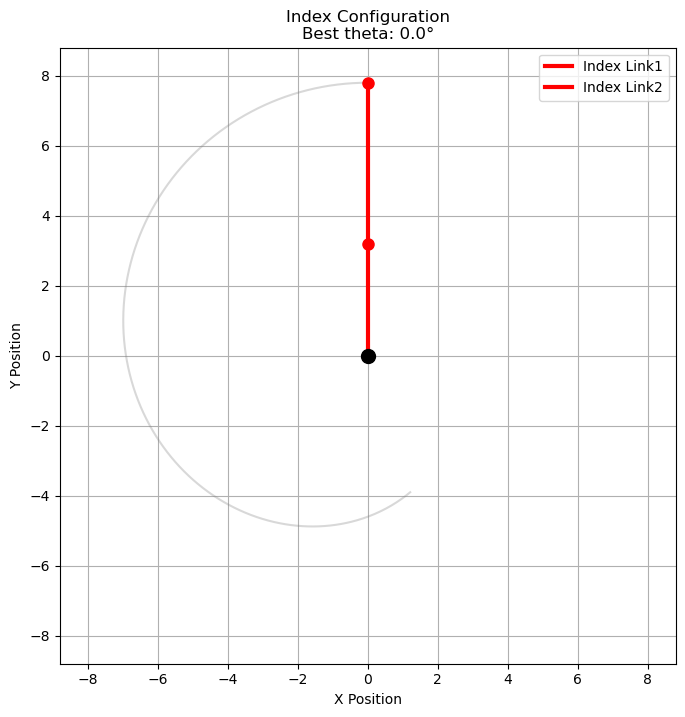

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def simulate_digit(l1, l2, alpha1_known, 
                  x_offset=0.0, y_offset=0.0, 
                  direction=1, theta_range=(0, 180)):
    """通用手指模拟函数"""
    theta_values = np.linspace(theta_range[0], theta_range[1], 600)
    best_theta = None
    best_error = float('inf')

    # 存储结果（初始化列表）
    results = {
        'theta': theta_values,
        'x_joint': [],
        'y_joint': [],
        'x_end': [],
        'y_end': [],
        'alpha1_calculated': []
    }

    for theta in theta_values:
        theta_rad = np.radians(theta)
        
        # 计算关节坐标
        x_joint = x_offset + direction * l1 * np.sin(theta_rad)
        y_joint = y_offset + l1 * np.cos(theta_rad)
        x_end = x_joint + direction * l2 * np.sin(2 * theta_rad)
        y_end = y_joint + l2 * np.cos(2 * theta_rad)

        # 计算alpha1角度
        dx = x_end - x_offset
        dy = y_end - y_offset
        alpha1_calculated = np.degrees(np.arctan2(dx, dy))

        # 记录结果
        results['x_joint'].append(x_joint)
        results['y_joint'].append(y_joint)
        results['x_end'].append(x_end)
        results['y_end'].append(y_end)
        results['alpha1_calculated'].append(alpha1_calculated)

        # 更新最佳theta
        error = abs(alpha1_calculated - alpha1_known)
        if error < best_error:
            best_error = error
            best_theta = theta

    # 关键修复：将列表转换为NumPy数组
    results['alpha1_calculated'] = np.array(results['alpha1_calculated'])
    results['x_joint'] = np.array(results['x_joint'])
    results['y_joint'] = np.array(results['y_joint'])
    results['x_end'] = np.array(results['x_end'])
    results['y_end'] = np.array(results['y_end'])
    
    return results, best_theta

def plot_digit(results, best_idx, 
              digit_name="Digit", color='red',
              x_offset=0.0, y_offset=0.0):
    """可视化函数"""
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # 绘制所有轨迹
    ax.plot(results['x_end'], results['y_end'], 'grey', alpha=0.3)
    
    # 绘制最佳位置
    x_joint = results['x_joint'][best_idx]
    y_joint = results['y_joint'][best_idx]
    x_end = results['x_end'][best_idx]
    y_end = results['y_end'][best_idx]
    
    # 绘制关节
    ax.plot([x_offset, x_joint], [y_offset, y_joint], 
            color=color, linewidth=3, label=f'{digit_name} Link1')
    ax.plot([x_joint, x_end], [y_joint, y_end], 
            color=color, linewidth=3, label=f'{digit_name} Link2')
    
    # 绘制连接点
    ax.plot(x_offset, y_offset, 'ko', markersize=10)  # 起始点
    ax.plot(x_joint, y_joint, 'o', color=color, markersize=8)
    ax.plot(x_end, y_end, 'o', color=color, markersize=8)
    
    # 标签和格式
    ax.set_title(f'{digit_name} Configuration\nBest theta: {results["theta"][best_idx]:.1f}°')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.legend()
    ax.grid(True)
    ax.set_aspect('equal')
    
    # 关键修改点3：动态调整坐标范围
    max_length = max(results['x_end'] + results['y_end']) 
    ax.set_xlim([x_offset - max_length - 1, x_offset + max_length + 1])
    ax.set_ylim([y_offset - max_length - 1, y_offset + max_length + 1])
    
    plt.show()

#=====================
# 测试调用（保持不变）
#=====================
if __name__ == "__main__":
    # 示例参数
    index_params = {
        'l1': 3.2, 
        'l2': 4.6,
        'alpha1_known': 60,
        'x_offset': 0.0,
        'y_offset': 0.0,
        'direction': 1,
        'theta_range': (0, 120)
    }

    thumb_params = {
        'l1': 2.5,
        'l2': 3.8,
        'alpha1_known': 50,
        'x_offset': 5.0,
        'y_offset': 0.0,
        'direction': -1,
        'theta_range': (0, 90)
    }

    # 模拟食指
    index_results, _ = simulate_digit(**index_params)
    best_idx_index = np.argmin(np.abs(index_results['alpha1_calculated'] - index_params['alpha1_known']))
    plot_digit(index_results, best_idx_index, 
              digit_name="Index", color='red', 
              x_offset=index_params['x_offset'], 
              y_offset=index_params['y_offset'])

    # 模拟大拇指
    thumb_results, _ = simulate_digit(**thumb_params)
    best_idx_thumb = np.argmin(np.abs(thumb_results['alpha1_calculated'] - thumb_params['alpha1_known']))
    plot_digit(thumb_results, best_idx_thumb, 
              digit_name="Thumb", color='blue',
              x_offset=thumb_params['x_offset'],
              y_offset=thumb_params['y_offset'])

Index Finger:
Theta: 166.63°
Alpha: 233.21°
Reached Position: (-1.3300341238243147, 0.9946194945274982)

Thumb:
Theta: 127.82°
Alpha: -132.03°
Reached Position: (-0.6130495263471465, -0.5525483005131355)


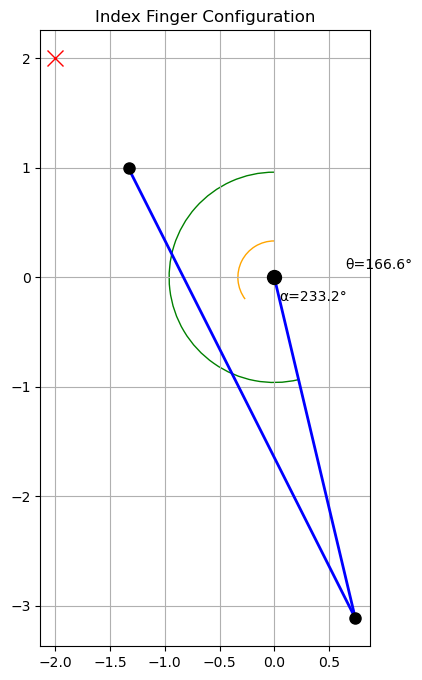

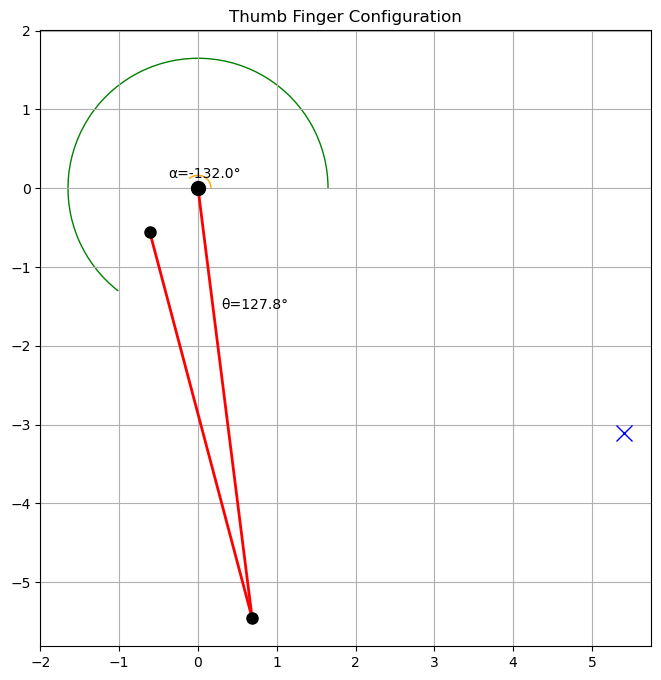

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import matplotlib.patches as patches

class FingerKinematics:
    def __init__(self, l1, l2, finger_type='index'):
        """
        初始化手指参数
        :param l1: 第一段长度
        :param l2: 第二段长度
        :param finger_type: 手指类型 ('index' 或 'thumb')
        """
        self.l1 = l1
        self.l2 = l2
        self.finger_type = finger_type
        
        # 根据手指类型调整参数
        if self.finger_type == 'thumb':
            self.theta_range = (180, 0)  # 运动方向相反
            self.base_angle = 45  # 基础位置偏移角度
        else:
            self.theta_range = (0, 180)
            self.base_angle = 0

    def forward_kinematics(self, theta):
        """正向运动学计算"""
        theta_rad = np.radians(theta + self.base_angle)
        
        if self.finger_type == 'thumb':
            # 大拇指使用反向运动方程
            x_joint = self.l1 * np.cos(theta_rad)
            y_joint = self.l1 * np.sin(theta_rad)
            x_end = x_joint + self.l2 * np.cos(2*theta_rad)
            y_end = y_joint + self.l2 * np.sin(2*theta_rad)
        else:
            # 食指保持原有运动方程
            x_joint = self.l1 * np.sin(theta_rad)
            y_joint = self.l1 * np.cos(theta_rad)
            x_end = x_joint + self.l2 * np.sin(2*theta_rad)
            y_end = y_joint + self.l2 * np.cos(2*theta_rad)

        return x_end, y_end

    def calculate_alpha(self, x, y):
        """计算alpha角度（与Y轴夹角）"""
        angle_rad = np.arctan2(x, y)
        alpha_rad = np.pi - angle_rad if self.finger_type == 'index' else angle_rad
        return np.degrees(alpha_rad)

    def inverse_kinematics(self, x_target, y_target):
        """逆向运动学求解"""
        def error_function(theta):
            x, y = self.forward_kinematics(theta[0])
            return (x - x_target)**2 + (y - y_target)**2

        # 优化范围根据手指类型调整
        bounds = [(min(self.theta_range), max(self.theta_range))]
        result = optimize.differential_evolution(error_function, bounds)
        
        best_theta = result.x[0]
        x_final, y_final = self.forward_kinematics(best_theta)
        alpha = self.calculate_alpha(x_final, y_final)
        
        return {
            'theta': best_theta,
            'alpha': alpha,
            'position': (x_final, y_final),
            'error': result.fun
        }

    def plot_configuration(self, theta, alpha, target=None):
        """绘制手指姿态"""
        x_joint = self.l1 * np.sin(np.radians(theta + self.base_angle))
        y_joint = self.l1 * np.cos(np.radians(theta + self.base_angle))
        x_end, y_end = self.forward_kinematics(theta)

        fig, ax = plt.subplots(figsize=(8, 8))
        
        # 绘制连杆
        ax.plot([0, x_joint], [0, y_joint], 'b-' if self.finger_type == 'index' else 'r-', linewidth=2)
        ax.plot([x_joint, x_end], [y_joint, y_end], 'b-' if self.finger_type == 'index' else 'r-', linewidth=2)
        
        # 绘制关节点
        ax.plot(0, 0, 'ko', markersize=10)
        ax.plot(x_joint, y_joint, 'ko', markersize=8)
        ax.plot(x_end, y_end, 'ko', markersize=8)
        
        # 标注角度
        self._draw_angle(ax, theta, (0, 0))
        self._draw_alpha(ax, alpha, (x_end, y_end))
        
        if target:
            ax.plot(target[0], target[1], 'rx' if self.finger_type == 'index' else 'bx', markersize=12)
        
        ax.set_title(f"{self.finger_type.capitalize()} Finger Configuration")
        ax.set_aspect('equal')
        ax.grid(True)
        plt.show()

    def _draw_angle(self, ax, theta, center):
        """绘制theta角度标注"""
        radius = self.l1 * 0.3
        start_angle = 90 if self.finger_type == 'index' else 0
        end_angle = start_angle - theta
        
        arc = patches.Arc(center, 2*radius, 2*radius,
                         theta1=start_angle, theta2=end_angle,
                         color='green', linewidth=1)
        ax.add_patch(arc)
        
        label_angle = np.radians((start_angle + end_angle)/2)
        label_pos = (
            center[0] + radius * np.cos(label_angle),
            center[1] + radius * np.sin(label_angle)
        )
        ax.text(*label_pos, f'θ={theta:.1f}°', ha='center', va='center')

    def _draw_alpha(self, ax, alpha, position):
        """绘制alpha角度标注"""
        radius = np.linalg.norm(position) * 0.2
        start_angle = 90 if self.finger_type == 'index' else 0
        end_angle = start_angle - alpha
        
        arc = patches.Arc((0,0), 2*radius, 2*radius,
                         theta1=start_angle, theta2=end_angle,
                         color='orange', linewidth=1)
        ax.add_patch(arc)
        
        label_angle = np.radians((start_angle + end_angle)/2)
        label_pos = (
            radius * 1.2 * np.cos(label_angle),
            radius * 1.2 * np.sin(label_angle)
        )
        ax.text(*label_pos, f'α={alpha:.1f}°', ha='center', va='center')

# 使用示例
if __name__ == "__main__":
    # 初始化两个手指
    index_finger = FingerKinematics(l1=3.2, l2=4.6)
    thumb = FingerKinematics(l1=5.5, l2=5, finger_type='thumb')

    # 设置目标位置
    target_index = (-2, 2)
    target_thumb = (5.4, -3.1)

    # 求解逆向运动学
    result_index = index_finger.inverse_kinematics(*target_index)
    result_thumb = thumb.inverse_kinematics(*target_thumb)

    # 打印结果
    print("Index Finger:")
    print(f"Theta: {result_index['theta']:.2f}°")
    print(f"Alpha: {result_index['alpha']:.2f}°")
    print(f"Reached Position: {result_index['position']}")

    print("\nThumb:")
    print(f"Theta: {result_thumb['theta']:.2f}°")
    print(f"Alpha: {result_thumb['alpha']:.2f}°")
    print(f"Reached Position: {result_thumb['position']}")

    # 绘制结果
    index_finger.plot_configuration(result_index['theta'], result_index['alpha'], target_index)
    thumb.plot_configuration(result_thumb['theta'], result_thumb['alpha'], target_thumb)

Index Finger Results:
Theta: 74.74°
Alpha: 119.92°
Final Position: (5.4228478163306395, -3.120861409534886)

Thumb Results:
Theta: 0.00°
Alpha: -90.00°
Final Position: (-2.9000000000000004, -8.2)


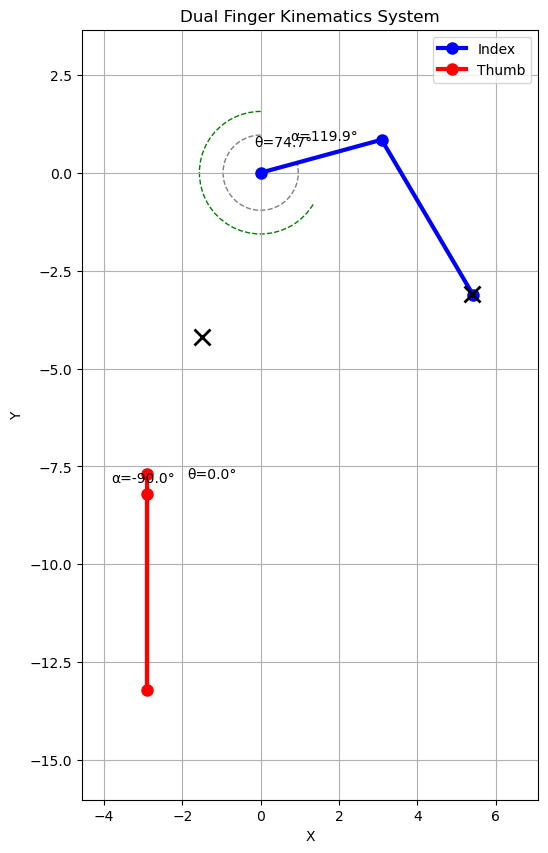

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import matplotlib.patches as patches

class DualFingerKinematics:
    def __init__(self):
        self.fingers = {
            'index': {
                'l1': 3.2,
                'l2': 4.6,
                'base_pos': (0, 0),
                'color': 'blue',
                'theta_range': (0, 180)  # 正常角度范围
            },
            'thumb': {
                'l1': 5.5,
                'l2': 5.0,
                'base_pos': (-2.9, -7.7),
                'color': 'red',
                'theta_range': (0, 180)  # 保持正常范围，通过运动方程实现反向运动
            }
        }

    def forward_kinematics(self, finger_type, theta):
        cfg = self.fingers[finger_type]
        theta_rad = np.radians(180 - theta if finger_type == 'thumb' else theta)  # 反向处理
        base_x, base_y = cfg['base_pos']
        
        # 统一使用正弦驱动方程
        x_joint = base_x + cfg['l1'] * np.sin(theta_rad)
        y_joint = base_y + cfg['l1'] * np.cos(theta_rad)
        x_end = x_joint + cfg['l2'] * np.sin(2*theta_rad)
        y_end = y_joint + cfg['l2'] * np.cos(2*theta_rad)
        
        return (x_joint, y_joint), (x_end, y_end)

    def calculate_alpha(self, finger_type, x, y):
        """计算alpha角度（与Y轴夹角）"""
        cfg = self.fingers[finger_type]
        base_x, base_y = cfg['base_pos']
        dx = x - base_x
        dy = y - base_y
        
        if finger_type == 'index':
            angle_rad = np.arctan2(dx, dy)
        else:
            angle_rad = np.arctan2(dy, dx)
        
        return np.degrees(angle_rad)

    def inverse_kinematics(self, finger_type, target_pos):
        cfg = self.fingers[finger_type]
        
        def error_function(theta):
            (_, _), (x, y) = self.forward_kinematics(finger_type, theta[0])
            return (x - target_pos[0])**2 + (y - target_pos[1])**2
        
        # 确保边界有效性
        lower = min(cfg['theta_range'])
        upper = max(cfg['theta_range'])
        
        result = optimize.differential_evolution(
            error_function,
            bounds=[(lower, upper)]
        )
        
        best_theta = result.x[0]
        (_, _), (x_final, y_final) = self.forward_kinematics(finger_type, best_theta)
        alpha = self.calculate_alpha(finger_type, x_final, y_final)
        
        return {
            'theta': best_theta,
            'alpha': alpha,
            'position': (x_final, y_final),
            'error': result.fun
        }

    def plot_dual_configuration(self, solutions, targets=None):
        """绘制双指系统"""
        fig, ax = plt.subplots(figsize=(10, 10))

        # 收集所有需要绘制的点
        all_points = []

        # 绘制两个手指
        for finger_type in ['index', 'thumb']:
            cfg = self.fingers[finger_type]
            sol = solutions[finger_type]

            # 获取关节点位置
            (x_joint, y_joint), (x_end, y_end) = self.forward_kinematics(
                finger_type, sol['theta'])

            # 记录所有关键点
            all_points.extend([
                cfg['base_pos'],
                (x_joint, y_joint),
                (x_end, y_end)
            ])

            # 绘制连杆
            ax.plot(
                [cfg['base_pos'][0], x_joint, x_end],
                [cfg['base_pos'][1], y_joint, y_end],
                color=cfg['color'],
                linewidth=3,
                marker='o',
                markersize=8,
                label=finger_type.capitalize()
            )

            # 标注角度
            self._draw_angle(ax, finger_type, sol['theta'])
            self._draw_alpha(ax, finger_type, x_end, y_end, sol['alpha'])

            # 绘制目标点并记录
            if targets and finger_type in targets:
                target = targets[finger_type]
                all_points.append(target)
                ax.plot(
                    target[0],
                    target[1],
                    'kx',
                    markersize=12,
                    markeredgewidth=2
                )

        # 计算坐标范围
        xs = [p[0] for p in all_points]
        ys = [p[1] for p in all_points]

        x_margin = (max(xs) - min(xs)) * 0.2
        y_margin = (max(ys) - min(ys)) * 0.2

        ax.set_xlim(min(xs)-x_margin, max(xs)+x_margin)
        ax.set_ylim(min(ys)-y_margin, max(ys)+y_margin)

        # 设置坐标系
        ax.set_title('Dual Finger Kinematics System')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.grid(True)
        ax.legend()
        ax.set_aspect('equal')

        plt.show()

    def _draw_angle(self, ax, finger_type, theta):
        """绘制theta角度标注"""
        cfg = self.fingers[finger_type]
        (x_joint, y_joint), _ = self.forward_kinematics(finger_type, theta)
        base_x, base_y = cfg['base_pos']
        radius = cfg['l1'] * 0.3
        
        if finger_type == 'index':
            start_angle = 90
            end_angle = 90 - theta
        else:
            start_angle = 0
            end_angle = theta
        
        arc = patches.Arc(
            (base_x, base_y),
            2*radius, 2*radius,
            theta1=start_angle,
            theta2=end_angle,
            color='gray',
            linestyle='--'
        )
        ax.add_patch(arc)
        
        # 标注文字
        label_angle = np.radians((start_angle + end_angle)/2)
        label_x = base_x + radius * np.cos(label_angle)
        label_y = base_y + radius * np.sin(label_angle)
        ax.text(label_x, label_y, f'θ={theta:.1f}°', ha='center', va='center')

    def _draw_alpha(self, ax, finger_type, x_end, y_end, alpha):
        """绘制alpha角度标注"""
        cfg = self.fingers[finger_type]
        base_x, base_y = cfg['base_pos']
        dx = x_end - base_x
        dy = y_end - base_y
        distance = np.sqrt(dx**2 + dy**2)
        radius = distance * 0.25
        
        if finger_type == 'index':
            start_angle = 90
            end_angle = 90 - alpha
        else:
            start_angle = np.degrees(np.arctan2(dy, dx))
            end_angle = start_angle + alpha
        
        arc = patches.Arc(
            (base_x, base_y),
            2*radius, 2*radius,
            theta1=start_angle,
            theta2=end_angle,
            color='green',
            linestyle='--'
        )
        ax.add_patch(arc)
        
        # 标注文字
        label_angle = np.radians((start_angle + end_angle)/2)
        label_x = base_x + radius * 1.2 * np.cos(np.radians((start_angle + end_angle)/2))
        label_y = base_y + radius * 1.2 * np.sin(np.radians((start_angle + end_angle)/2))
        ax.text(label_x, label_y, f'α={alpha:.1f}°', ha='center', va='center')

# 使用示例
if __name__ == "__main__":
    system = DualFingerKinematics()
    
    # 设置目标位置
    targets = {
        'index': (5.4, -3.1),
        'thumb': (-1.5, -4.2)
    }
    
    # 求解逆向运动学
    solutions = {
        'index': system.inverse_kinematics('index', targets['index']),
        'thumb': system.inverse_kinematics('thumb', targets['thumb'])
    }
    
    # 打印结果
    print("Index Finger Results:")
    print(f"Theta: {solutions['index']['theta']:.2f}°")
    print(f"Alpha: {solutions['index']['alpha']:.2f}°")
    print(f"Final Position: {solutions['index']['position']}\n")
    
    print("Thumb Results:")
    print(f"Theta: {solutions['thumb']['theta']:.2f}°")
    print(f"Alpha: {solutions['thumb']['alpha']:.2f}°")
    print(f"Final Position: {solutions['thumb']['position']}")
    
    # 绘制双指系统
    system.plot_dual_configuration(solutions, targets)

食指结果:
关节角度 θ = 166.6°
末端角度 α = -53.2°
实际位置 = (-1.33, 0.99)

大拇指结果:
关节角度 θ = 180.0°
末端角度 α = 0.0°
实际位置 = (-2.90, 2.80)


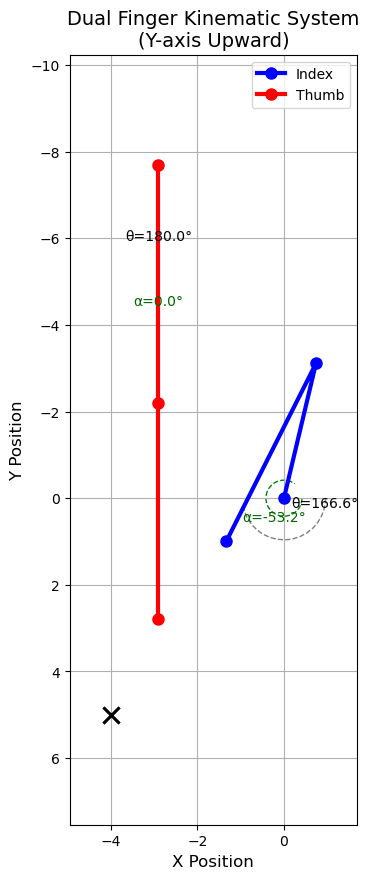

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import matplotlib.patches as patches

class DualFingerSystem:
    def __init__(self):
        """初始化双指系统参数"""
        self.finger_config = {
            'index': {
                'lengths': (3.2, 4.6),    # (l1, l2)
                'base_pos': (0.0, 0.0),    # 起点坐标
                'color': 'blue',
                'theta_range': (0, 180)    # 角度范围
            },
            'thumb': {
                'lengths': (5.5, 5.0),
                'base_pos': (-2.9, -7.7),   # 大拇指起点
                'color': 'red',
                'theta_range': (0, 180)
            }
        }

    def forward_kinematics(self, finger_type, theta):
        """正向运动学计算（Y轴向上）"""
        cfg = self.finger_config[finger_type]
        l1, l2 = cfg['lengths']
        base_x, base_y = cfg['base_pos']
        
        # 转换为弧度（大拇指使用反向运动）
        theta_rad = np.radians(180 - theta) if finger_type == 'thumb' else np.radians(theta)
        
        # 第一关节位置
        x1 = base_x + l1 * np.sin(theta_rad)
        y1 = base_y + l1 * np.cos(theta_rad)
        
        # 末端位置
        x2 = x1 + l2 * np.sin(2*theta_rad)
        y2 = y1 + l2 * np.cos(2*theta_rad)
        
        return (x1, y1), (x2, y2)

    def calculate_alpha(self, finger_type, x_end, y_end):
        """计算与Y轴正方向的夹角（单位：度）"""
        cfg = self.finger_config[finger_type]
        base_x, base_y = cfg['base_pos']
        
        dx = x_end - base_x
        dy = y_end - base_y
        
        # 计算与Y轴正方向的夹角（0°表示垂直向上）
        angle_rad = np.arctan2(dx, dy)
        return np.degrees(angle_rad)

    def inverse_kinematics(self, finger_type, target_pos):
        """逆向运动学求解"""
        cfg = self.finger_config[finger_type]
        l1, l2 = cfg['lengths']
        
        def error_function(theta):
            (_, _), (x, y) = self.forward_kinematics(finger_type, theta[0])
            return (x - target_pos[0])**2 + (y - target_pos[1])**2
        
        # 确保边界有效性
        lower, upper = sorted(cfg['theta_range'])
        result = optimize.differential_evolution(
            error_function,
            bounds=[(lower, upper)],
            strategy='best1bin'
        )
        
        best_theta = result.x[0]
        (_, _), final_pos = self.forward_kinematics(finger_type, best_theta)
        alpha = self.calculate_alpha(finger_type, *final_pos)
        
        return {
            'theta': best_theta,
            'alpha': alpha,
            'position': final_pos,
            'error': result.fun
        }

    def plot_dual_system(self, solutions, targets=None):
        """绘制双指系统"""
        fig, ax = plt.subplots(figsize=(10, 10))
        all_points = []
        
        # 收集所有关键点并绘制
        for finger_type in ['index', 'thumb']:
            cfg = self.finger_config[finger_type]
            sol = solutions[finger_type]
            
            # 获取关节位置
            (x1, y1), (x2, y2) = self.forward_kinematics(finger_type, sol['theta'])
            
            # 记录所有关键点
            all_points.extend([cfg['base_pos'], (x1, y1), (x2, y2)])
            
            # 绘制运动链
            ax.plot(
                [cfg['base_pos'][0], x1, x2],
                [cfg['base_pos'][1], y1, y2],
                color=cfg['color'],
                linewidth=3,
                marker='o',
                markersize=8,
                label=finger_type.capitalize()
            )
            
            # 标注角度
            self._draw_theta(ax, finger_type, sol['theta'])
            self._draw_alpha(ax, finger_type, x2, y2, sol['alpha'])
            
            # 绘制目标点
            if targets and finger_type in targets:
                target = targets[finger_type]
                all_points.append(target)
                ax.plot(*target, 'kx', markersize=12, markeredgewidth=2)
        
        # 设置坐标轴
        self._set_axes(ax, all_points)
        ax.set_title("Dual Finger Kinematic System\n(Y-axis Upward)", fontsize=14)
        ax.legend(loc='upper right')
        plt.show()

    def _draw_theta(self, ax, finger_type, theta):
        """绘制关节角度θ"""
        cfg = self.finger_config[finger_type]
        base_x, base_y = cfg['base_pos']
        (x1, y1), _ = self.forward_kinematics(finger_type, theta)
        
        radius = cfg['lengths'][0] * 0.3
        start_angle = 0  # Y轴正方向
        
        # 计算实际角度
        dx = x1 - base_x
        dy = y1 - base_y
        end_angle = np.degrees(np.arctan2(dx, dy))
        
        # 绘制圆弧
        arc = patches.Arc(
            (base_x, base_y),
            2*radius, 2*radius,
            theta1=start_angle,
            theta2=end_angle,
            color='gray',
            linestyle='--'
        )
        ax.add_patch(arc)
        
        # 标注文字
        label_angle = (start_angle + end_angle) / 2
        label_x = base_x + radius * np.sin(np.radians(label_angle))
        label_y = base_y + radius * np.cos(np.radians(label_angle))
        ax.text(label_x, label_y, f'θ={theta:.1f}°', ha='center', va='center')

    def _draw_alpha(self, ax, finger_type, x_end, y_end, alpha):
        """绘制末端角度α"""
        cfg = self.finger_config[finger_type]
        base_x, base_y = cfg['base_pos']
        
        dx = x_end - base_x
        dy = y_end - base_y
        distance = np.hypot(dx, dy)
        radius = distance * 0.25
        
        # 计算标注角度
        start_angle = 0  # Y轴正方向
        end_angle = np.degrees(np.arctan2(dx, dy))
        
        # 绘制圆弧
        arc = patches.Arc(
            (base_x, base_y),
            2*radius, 2*radius,
            theta1=start_angle,
            theta2=end_angle,
            color='green',
            linestyle='--'
        )
        ax.add_patch(arc)
        
        # 标注文字
        label_angle = (start_angle + end_angle) / 2
        label_x = base_x + radius * 1.2 * np.sin(np.radians(label_angle))
        label_y = base_y + radius * 1.2 * np.cos(np.radians(label_angle))
        ax.text(label_x, label_y, f'α={alpha:.1f}°', ha='center', va='center', color='darkgreen')

    def _set_axes(self, ax, points):
        """设置坐标轴范围和样式"""
        xs = [p[0] for p in points]
        ys = [p[1] for p in points]
        
        x_margin = (max(xs) - min(xs)) * 0.2
        y_margin = (max(ys) - min(ys)) * 0.2
        
        ax.set_xlim(min(xs)-x_margin, max(xs)+x_margin)
        ax.set_ylim(max(ys)+y_margin, min(ys)-y_margin)  # 反转Y轴方向
        ax.set_aspect('equal')
        ax.grid(True)
        ax.set_xlabel("X Position", fontsize=12)
        ax.set_ylabel("Y Position", fontsize=12)

# 使用示例
if __name__ == "__main__":
    system = DualFingerSystem()
    
    # 设置目标位置（Y轴正方向坐标系）
    targets = {
        'index': (-4.0, 5.0),   # 食指目标
        'thumb': (-4.0, 5.0)    # 大拇指目标
    }
    
    # 求解逆向运动学
    solutions = {
        'index': system.inverse_kinematics('index', targets['index']),
        'thumb': system.inverse_kinematics('thumb', targets['thumb'])
    }
    
    # 打印结果
    print("食指结果:")
    print(f"关节角度 θ = {solutions['index']['theta']:.1f}°")
    print(f"末端角度 α = {solutions['index']['alpha']:.1f}°")
    print(f"实际位置 = ({solutions['index']['position'][0]:.2f}, {solutions['index']['position'][1]:.2f})\n")
    
    print("大拇指结果:")
    print(f"关节角度 θ = {solutions['thumb']['theta']:.1f}°")
    print(f"末端角度 α = {solutions['thumb']['alpha']:.1f}°")
    print(f"实际位置 = ({solutions['thumb']['position'][0]:.2f}, {solutions['thumb']['position'][1]:.2f})")
    
    # 可视化结果
    system.plot_dual_system(solutions, targets)

逆向运动学结果：
关节角度 θ = 74.79°
末端角度 α1 = 60.00°
实际到达位置 = (5.42, -3.13)


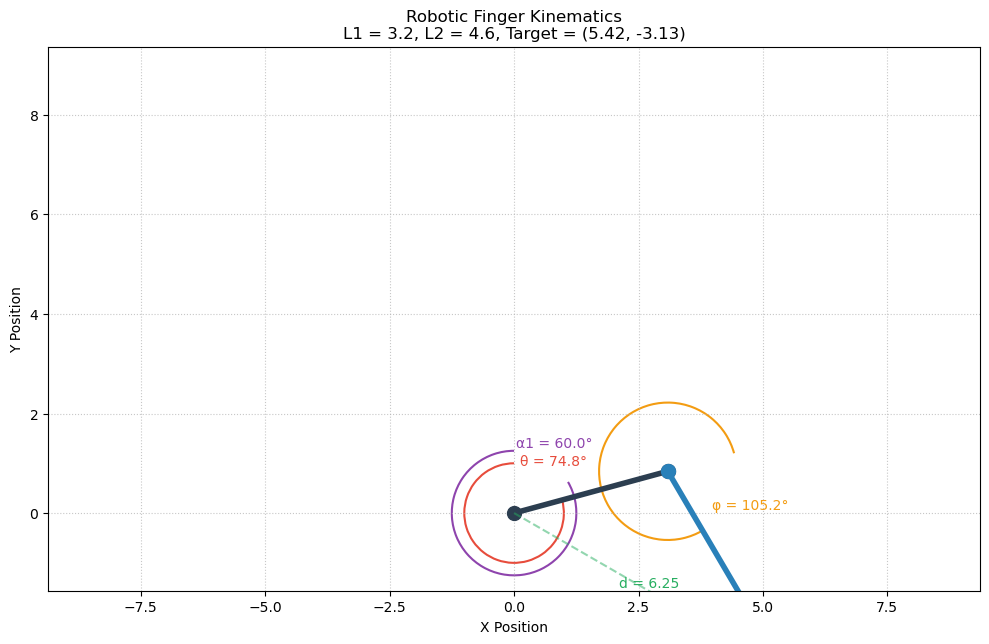

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import matplotlib.patches as patches

# ================== 正向运动学 ==================
def forward_kinematics(theta, l1, l2):
    """计算末端坐标和关键点位置"""
    theta_rad = np.radians(theta)
    
    # 第一关节位置
    x_joint = l1 * np.sin(theta_rad)
    y_joint = l1 * np.cos(theta_rad)
    
    # 末端位置（第二关节角度为2θ）
    x_end = x_joint + l2 * np.sin(2 * theta_rad)
    y_end = y_joint + l2 * np.cos(2 * theta_rad)
    
    return (x_joint, y_joint), (x_end, y_end)

def calculate_alpha1(x_end, y_end):
    """修正后的alpha1计算（相对于正y轴）"""
    angle_rad = np.arctan2(x_end, y_end)  # 修正参数顺序
    alpha1_rad = np.pi - angle_rad     # 转换为与y轴的夹角
    return np.degrees(alpha1_rad) % 360  # 规范化到[0, 360)

# ================== 逆向运动学 ==================
def inverse_kinematics(l1, l2, target, method='global'):
    """
    改进的逆向运动学求解
    参数：
        target - 目标坐标 (x, y)
        method - 优化方法 ('global' 或 'local')
    """
    x_target, y_target = target
    
    def error(theta):
        (_, _), (x, y) = forward_kinematics(theta, l1, l2)
        return (x - x_target)**2 + (y - y_target)**2
    
    # 全局优化（粗搜索 + 精细优化）
    if method == 'global':
        # 粗粒度网格搜索
        theta_grid = np.linspace(0, 180, 100)
        losses = [error(t) for t in theta_grid]
        initial_guess = theta_grid[np.argmin(losses)]
        
        # 局部优化
        result = optimize.minimize(
            error,
            initial_guess,
            bounds=[(0, 180)],
            method='L-BFGS-B'
        )
    else:
        # 纯局部优化
        result = optimize.minimize(
            error,
            90,
            bounds=[(0, 180)],
            method='L-BFGS-B'
        )
    
    if not result.success:
        raise ValueError("无法找到有效解，目标点可能超出工作空间")
    
    best_theta = result.x[0]
    (x_joint, y_joint), (x_end, y_end) = forward_kinematics(best_theta, l1, l2)
    alpha1 = calculate_alpha1(x_end, y_end)
    
    return {
        'theta': best_theta,
        'alpha1': alpha1,
        'position': (x_end, y_end),
        'joint_pos': (x_joint, y_joint)
    }

# ================== 可视化 ==================
def plot_configuration(l1, l2, result, target=None):
    """增强的可视化绘图"""
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # 提取数据
    theta = result['theta']
    alpha1 = result['alpha1']
    (x_joint, y_joint) = result['joint_pos']
    (x_end, y_end) = result['position']
    
    # 绘制连杆
    ax.plot([0, x_joint], [0, y_joint], 'o-', color='#2c3e50', lw=4, ms=10)
    ax.plot([x_joint, x_end], [y_joint, y_end], 'o-', color='#2980b9', lw=4, ms=10)
    
    # 绘制辅助线
    ax.plot([0, x_end], [0, y_end], '--', color='#27ae60', alpha=0.5)
    ax.text(x_end/2, y_end/2, f'd = {np.hypot(x_end, y_end):.2f}', 
           color='#27ae60', ha='center', va='bottom')
    
    # 绘制角度标注
    def draw_angle(ax, center, start_angle, end_angle, radius, color, label):
        arc = patches.Arc(center, 2*radius, 2*radius,
                          theta1=start_angle, theta2=end_angle,
                          color=color, lw=1.5)
        ax.add_patch(arc)
        mid_angle = np.radians((start_angle + end_angle)/2)
        ax.text(center[0] + radius*1.3*np.cos(mid_angle),
                center[1] + radius*1.3*np.sin(mid_angle),
                label, color=color, ha='center', va='center')
    
    # θ 角度
    draw_angle(ax, (0,0), 90, 90-theta, 1, '#e74c3c', 
              f'θ = {theta:.1f}°')
    
    # α1 角度
    alpha1_radius = np.hypot(x_end, y_end)*0.2
    start_angle = 90
    end_angle = 90 - alpha1
    draw_angle(ax, (0,0), start_angle, end_angle, alpha1_radius,
              '#8e44ad', f'α1 = {alpha1:.1f}°')
    
    # 关节角度
    joint_angle = 180 - theta
    draw_angle(ax, (x_joint, y_joint), 
              np.degrees(np.arctan2(y_joint, x_joint)),
              np.degrees(np.arctan2(y_end-y_joint, x_end-x_joint)),
              l2*0.3, '#f39c12', f'φ = {joint_angle:.1f}°')
    
    # 目标点
    if target:
        ax.plot(target[0], target[1], 'rx', markersize=15, 
               markeredgewidth=2, label='Target')
    
    # 图例设置
    ax.set_xlim(-(l1+l2)*1.2, (l1+l2)*1.2)
    ax.set_ylim(-(l1+l2)*0.2, (l1+l2)*1.2)
    ax.set_aspect('equal')
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.set_title("Robotic Finger Kinematics\n"
                f"L1 = {l1}, L2 = {l2}, Target = {target if target else 'None'}")
    plt.tight_layout()
    plt.show()

# ================== 示例使用 ==================
if __name__ == "__main__":
    # 机械参数
    l1, l2 = 3.2, 4.6
    target = (5.42, -3.13)
    
    try:
        # 逆向运动学计算
        result = inverse_kinematics(l1, l2, target, method='global')
        
        # 打印结果
        print("逆向运动学结果：")
        print(f"关节角度 θ = {result['theta']:.2f}°")
        print(f"末端角度 α1 = {result['alpha1']:.2f}°")
        print(f"实际到达位置 = ({result['position'][0]:.2f}, {result['position'][1]:.2f})")
        
        # 可视化
        plot_configuration(l1, l2, result, target)
        
    except ValueError as e:
        print(f"错误：{str(e)}")

大拇指逆向运动学结果：
关节角度 θ = 79.52°
末端角度 α1 = 44.61°
实际位置 = (3.62, 3.67)


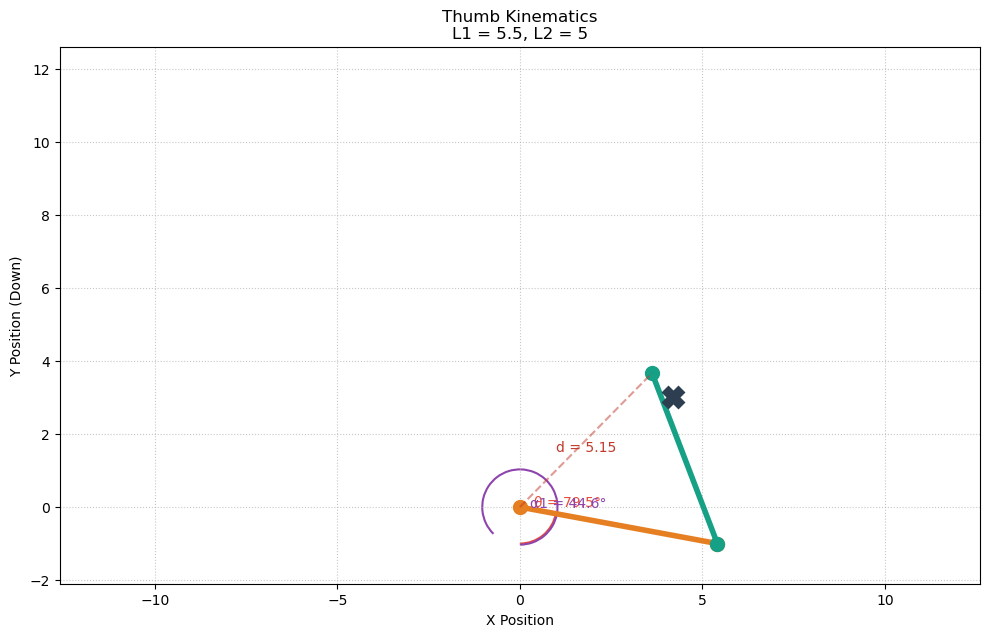

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import matplotlib.patches as patches

# ================== 正向运动学 ==================
def thumb_forward_kinematics(theta, l1, l2):
    """大拇指正向运动学（y轴向下）"""
    theta_rad = np.radians(theta)
    
    # 关节位置（y轴向下）
    x_joint = l1 * np.sin(theta_rad)
    y_joint = -l1 * np.cos(theta_rad)  # y轴向下
    
    # 末端位置（第二关节反向弯曲）
    x_end = x_joint + l2 * np.sin(-2 * theta_rad)  # 反向弯曲
    y_end = y_joint - l2 * np.cos(2 * theta_rad)   # y轴向下
    
    return (x_joint, y_joint), (x_end, y_end)

def calculate_thumb_alpha1(x_end, y_end):
    """大拇指alpha1计算（相对于负y轴顺时针）"""
    angle_rad = np.arctan2(x_end, -y_end)  # 负y轴为基准
    alpha1_rad = np.pi - angle_rad
    return np.degrees(alpha1_rad) % 360

# ================== 逆向运动学 ==================
def thumb_inverse_kinematics(l1, l2, target, method='global'):
    """
    大拇指逆向运动学求解
    参数：
        target - 目标坐标 (x, y)（y轴向下）
        method - 优化方法
    """
    x_target, y_target = target
    
    def error(theta):
        (_, _), (x, y) = thumb_forward_kinematics(theta, l1, l2)
        return (x - x_target)**2 + (y - y_target)**2
    
    # 全局优化
    if method == 'global':
        theta_grid = np.linspace(0, 180, 100)
        losses = [error(t) for t in theta_grid]
        initial_guess = theta_grid[np.argmin(losses)]
        result = optimize.minimize(error, initial_guess, bounds=[(0, 180)], method='L-BFGS-B')
    else:
        result = optimize.minimize(error, 90, bounds=[(0, 180)], method='L-BFGS-B')
    
    if not result.success:
        raise ValueError("目标不可达")
    
    best_theta = result.x[0]
    (x_joint, y_joint), (x_end, y_end) = thumb_forward_kinematics(best_theta, l1, l2)
    alpha1 = calculate_thumb_alpha1(x_end, y_end)
    
    return {
        'theta': best_theta,
        'alpha1': alpha1,
        'position': (x_end, y_end),
        'joint_pos': (x_joint, y_joint)
    }

# ================== 可视化 ==================
def plot_thumb_configuration(l1, l2, result, target=None):
    """大拇指专用可视化"""
    fig, ax = plt.subplots(figsize=(10, 10))
    theta = result['theta']
    alpha1 = result['alpha1']
    (x_joint, y_joint) = result['joint_pos']
    (x_end, y_end) = result['position']
    
    # 绘制连杆（颜色区分）
    ax.plot([0, x_joint], [0, y_joint], 'o-', color='#e67e22', lw=4, ms=10)
    ax.plot([x_joint, x_end], [y_joint, y_end], 'o-', color='#16a085', lw=4, ms=10)
    
    # 辅助线
    ax.plot([0, x_end], [0, y_end], '--', color='#c0392b', alpha=0.5)
    ax.text(x_end/2, y_end/2, f'd = {np.hypot(x_end, y_end):.2f}', 
           color='#c0392b', ha='center', va='top')
    
    # 角度标注函数
    def draw_thumb_angle(ax, center, start, end, radius, color, label):
        arc = patches.Arc(center, 2*radius, 2*radius,
                         theta1=start, theta2=end, color=color, lw=1.5)
        ax.add_patch(arc)
        mid_angle = np.radians((start + end)/2)
        ax.text(center[0] + radius*1.3*np.cos(np.radians(mid_angle)),
                center[1] + radius*1.3*np.sin(np.radians(mid_angle)),
                label, color=color, ha='center', va='center')
    
    # θ 角度标注（反向）
    draw_thumb_angle(ax, (0,0), 270, 270+theta, 1, '#e74c3c', 
                    f'θ = {theta:.1f}°')
    
    # α1 角度
    alpha1_radius = np.hypot(x_end, y_end)*0.2
    draw_thumb_angle(ax, (0,0), 270, 270-alpha1, alpha1_radius,
                    '#8e44ad', f'α1 = {alpha1:.1f}°')
    
    # 设置坐标轴
    ax.set_xlim(-(l1+l2)*1.2, (l1+l2)*1.2)
    ax.set_ylim(-(l1+l2)*0.2, (l1+l2)*1.2)
    ax.set_aspect('equal')
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position (Down)")
    ax.set_title("Thumb Kinematics\nL1 = {}, L2 = {}".format(l1, l2))
    
    if target:
        ax.plot(target[0], target[1], 'X', color='#2c3e50', markersize=15, 
               markeredgewidth=2, label='Target')
    
    plt.tight_layout()
    plt.show()

l1, l2 = 5.5, 5  # 较短的大拇指尺寸
target = (4.2, 3.0)  # y轴向下坐标系
    
result = thumb_inverse_kinematics(l1, l2, target)
        
print("大拇指逆向运动学结果：")
print(f"关节角度 θ = {result['theta']:.2f}°")
print(f"末端角度 α1 = {result['alpha1']:.2f}°")
print(f"实际位置 = ({result['position'][0]:.2f}, {result['position'][1]:.2f})")
        
plot_thumb_configuration(l1, l2, result, target)

食指结果：
关节角度：51.34°
末端角度α：98.06°
实际位置：[6.9865859  0.98974225]

大拇指结果：
关节角度：113.44°
末端角度α：57.19°
实际位置：[ 5.79550958 -2.0944071 ]


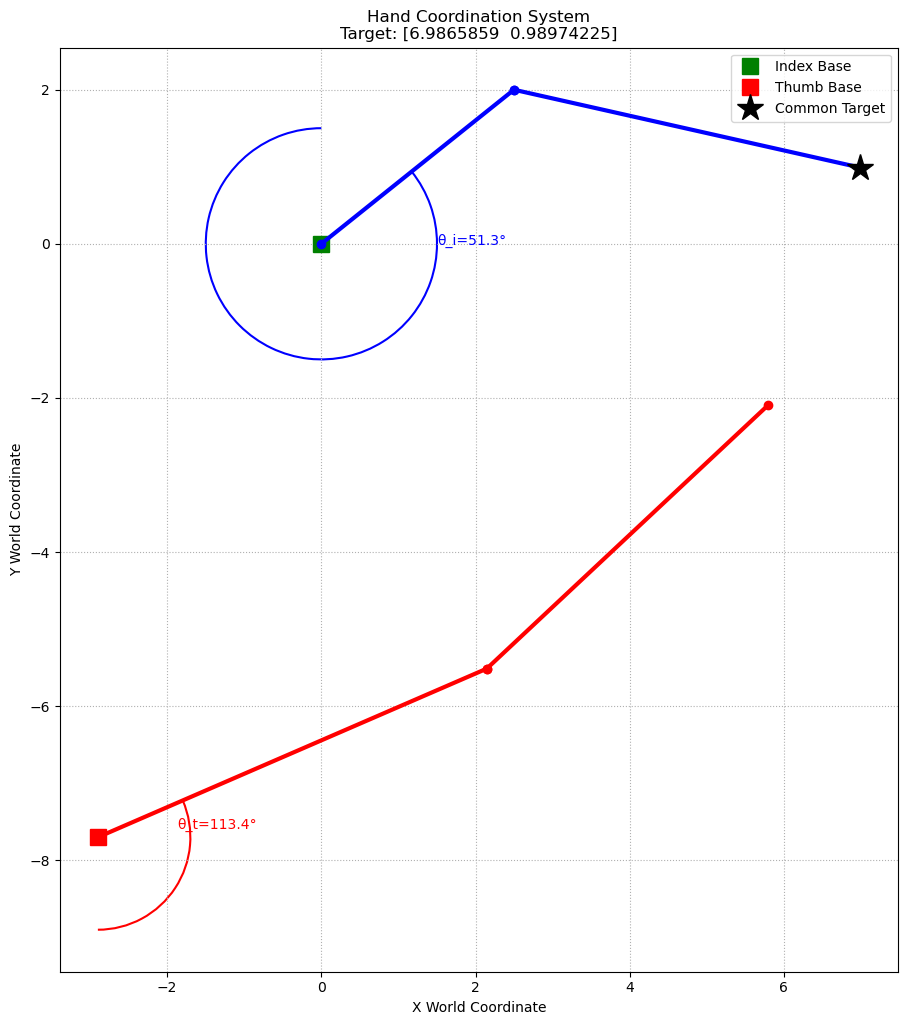

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from matplotlib.patches import Arc

# ================== 基础手指类 ==================
class Finger:
    def __init__(self, l1, l2, base_offset, is_thumb=False):
        """
        参数：
            l1, l2 - 连杆长度
            base_offset - 基准点偏移 (x, y) 世界坐标系
            is_thumb - 是否为大拇指（反向运动）
        """
        self.l1 = l1
        self.l2 = l2
        self.base_offset = np.array(base_offset)
        self.is_thumb = is_thumb

    def forward_kinematics(self, theta):
        """返回世界坐标系中的位置"""
        theta_rad = np.radians(theta)
        
        # 局部坐标系计算
        if self.is_thumb:
            x_joint = self.l1 * np.sin(theta_rad)
            y_joint_local = -self.l1 * np.cos(theta_rad)
            x_end = x_joint + self.l2 * np.sin(-2*theta_rad)
            y_end_local = y_joint_local - self.l2 * np.cos(2*theta_rad)
        else:
            x_joint = self.l1 * np.sin(theta_rad)
            y_joint_local = self.l1 * np.cos(theta_rad)
            x_end = x_joint + self.l2 * np.sin(2*theta_rad)
            y_end_local = y_joint_local + self.l2 * np.cos(2*theta_rad)

        # 转换为世界坐标系
        joint_world = self.base_offset + np.array([x_joint, y_joint_local])
        end_world = self.base_offset + np.array([x_end, y_end_local])
        
        return joint_world, end_world

    def calculate_alpha(self, end_world):
        """计算世界坐标系中的alpha角度"""
        # 转换为局部坐标系
        end_local = end_world - self.base_offset
        x, y = end_local
        
        if self.is_thumb:
            # 大拇指：相对于负y轴顺时针
            angle_rad = np.arctan2(x, -y)
            alpha_rad = np.pi - angle_rad
        else:
            # 食指：相对于正y轴顺时针 
            angle_rad = np.arctan2(x, y)
            alpha_rad = np.pi - angle_rad
            
        return np.degrees(alpha_rad) % 360

    def inverse_kinematics(self, target_world, method='global'):
        """世界坐标系目标点求解"""
        # 转换到局部坐标系
        target_local = target_world - self.base_offset
        
        def error(theta):
            _, end_local = self.forward_kinematics(theta)
            error = np.linalg.norm(end_local - target_local)
            return error**2

        # 优化求解
        if method == 'global':
            theta_grid = np.linspace(0, 180, 100)
            losses = [error(t) for t in theta_grid]
            initial_guess = theta_grid[np.argmin(losses)]
        else:
            initial_guess = 90
            
        result = optimize.minimize(
            error,
            initial_guess,
            bounds=[(0, 180)],
            method='L-BFGS-B'
        )
        
        if not result.success:
            raise ValueError(f"无法到达目标点 {target_world}")
            
        return result.x[0]

# ================== 协同控制系统 ==================
class HandSystem:
    def __init__(self):
        # 定义手指基准点（世界坐标系）
        self.index = Finger(
            l1=3.2, 
            l2=4.6,
            base_offset=(0, 0)  # 食指基准点
        )
        
        self.thumb = Finger(
            l1=5.5,
            l2=5.0,
            base_offset=(-2.9, -7.7),  # 大拇指基准点
            is_thumb=True
        )

    def reach_common_target(self, target_world):
        """控制双手指到达同一目标点"""
        try:
            # 食指求解
            theta_index = self.index.inverse_kinematics(target_world)
            joint_index, end_index = self.index.forward_kinematics(theta_index)
            alpha_index = self.index.calculate_alpha(end_index)
            
            # 大拇指求解
            theta_thumb = self.thumb.inverse_kinematics(target_world)
            joint_thumb, end_thumb = self.thumb.forward_kinematics(theta_thumb)
            alpha_thumb = self.thumb.calculate_alpha(end_thumb)
            
            return {
                'index': {
                    'theta': theta_index,
                    'alpha': alpha_index,
                    'position': end_index,
                    'joint': joint_index
                },
                'thumb': {
                    'theta': theta_thumb,
                    'alpha': alpha_thumb,
                    'position': end_thumb,
                    'joint': joint_thumb
                }
            }
            
        except ValueError as e:
            print(f"运动规划失败：{str(e)}")
            return None

    def plot_hand(self, result):
        """可视化双手协调运动"""
        fig, ax = plt.subplots(figsize=(12, 12))
        
        # 绘制基准点
        ax.plot(*self.index.base_offset, 'gs', markersize=12, label='Index Base')
        ax.plot(*self.thumb.base_offset, 'rs', markersize=12, label='Thumb Base')
        
        # 绘制食指
        index_data = result['index']
        ax.plot([self.index.base_offset[0], index_data['joint'][0]],
                [self.index.base_offset[1], index_data['joint'][1]], 
                'b-o', lw=3)
        ax.plot([index_data['joint'][0], index_data['position'][0]],
                [index_data['joint'][1], index_data['position'][1]], 
                'b-o', lw=3)
        
        # 绘制大拇指
        thumb_data = result['thumb']
        ax.plot([self.thumb.base_offset[0], thumb_data['joint'][0]],
                [self.thumb.base_offset[1], thumb_data['joint'][1]], 
                'r-o', lw=3)
        ax.plot([thumb_data['joint'][0], thumb_data['position'][0]],
                [thumb_data['joint'][1], thumb_data['position'][1]], 
                'r-o', lw=3)
        
        # 标注角度
        def draw_angle(ax, center, start, end, radius, color, label):
            arc = Arc(center, 2*radius, 2*radius, theta1=start, theta2=end, 
                     color=color, lw=1.5)
            ax.add_patch(arc)
            mid_angle = np.radians((start + end)/2)
            ax.text(center[0] + radius*1.3*np.cos(np.radians(mid_angle)),
                    center[1] + radius*1.3*np.sin(np.radians(mid_angle)),
                    label, color=color, ha='center', va='center')
        
        # 食指角度
        draw_angle(ax, self.index.base_offset, 90, 90-index_data['theta'], 
                  1.5, 'blue', f'θ_i={index_data["theta"]:.1f}°')
        
        # 大拇指角度
        draw_angle(ax, self.thumb.base_offset, 270, 270+thumb_data['theta'], 
                  1.2, 'red', f'θ_t={thumb_data["theta"]:.1f}°')
        
        # 公共目标点
        ax.plot(*result['index']['position'], 'k*', markersize=20, 
               label='Common Target')
        
        # 设置坐标系
        ax.set_aspect('equal')
        ax.grid(True, linestyle=':')
        ax.set_xlabel("X World Coordinate")
        ax.set_ylabel("Y World Coordinate")
        ax.legend()
        plt.title(f"Hand Coordination System\nTarget: {result['index']['position']}")
        plt.show()

# ================== 使用示例 ==================
if __name__ == "__main__":
    hand = HandSystem()
    
    # 指定世界坐标系目标点
    target_world = np.array([5.0, -3.0])  # 注意y坐标为负表示下方
    
    # 协同运动规划
    result = hand.reach_common_target(target_world)
    
    if result:
        print("食指结果：")
        print(f"关节角度：{result['index']['theta']:.2f}°")
        print(f"末端角度α：{result['index']['alpha']:.2f}°")
        print(f"实际位置：{result['index']['position']}")
        
        print("\n大拇指结果：")
        print(f"关节角度：{result['thumb']['theta']:.2f}°")
        print(f"末端角度α：{result['thumb']['alpha']:.2f}°")
        print(f"实际位置：{result['thumb']['position']}")
        
        hand.plot_hand(result)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib.patches import Arc

# ================== 手指运动学核心类 ==================
class RoboticFinger:
    def __init__(self, link1, link2, base_pos, is_thumb=False):
        """
        参数：
            link1: 第一段长度 (cm)
            link2: 第二段长度 (cm)
            base_pos: 基准点世界坐标 (x, y)
            is_thumb: 是否为大拇指
        """
        self.l1 = link1
        self.l2 = link2
        self.base = np.array(base_pos)
        self.is_thumb = is_thumb
        
        # 运动范围限制
        self.max_reach = link1 + link2
        self.min_reach = abs(link1 - link2)

    def _local_to_world(self, local_pos):
        """局部坐标转世界坐标"""
        return self.base + local_pos

    def forward_kinematics(self, theta_deg):
        """正向运动学计算（世界坐标系）"""
        theta = np.radians(theta_deg)
        
        # 局部坐标系计算
        if self.is_thumb:
            # 大拇指局部坐标系y轴向下
            x1 = self.l1 * np.sin(theta)
            y1 = -self.l1 * np.cos(theta)
            x2 = x1 + self.l2 * np.sin(-2*theta)  # 反向弯曲
            y2 = y1 - self.l2 * np.cos(2*theta)
        else:
            # 食指局部坐标系y轴向上
            x1 = self.l1 * np.sin(theta)
            y1 = self.l1 * np.cos(theta)
            x2 = x1 + self.l2 * np.sin(2*theta)
            y2 = y1 + self.l2 * np.cos(2*theta)
        
        # 转换为世界坐标
        joint_world = self._local_to_world([x1, y1])
        tip_world = self._local_to_world([x2, y2])
        return joint_world, tip_world

    def inverse_kinematics(self, target_world, max_iter=1000):
        """逆向运动学求解（世界坐标系）"""
        target_local = np.array(target_world) - self.base
        
        # 可达性检查
        dist = np.linalg.norm(target_local)
        if not (self.min_reach <= dist <= self.max_reach):
            raise ValueError(f"目标点 {target_world} 超出工作空间 "
                             f"[{self.min_reach:.1f}, {self.max_reach:.1f}]cm")

        # 误差函数定义
        def optimization_error(theta):
            _, tip = self.forward_kinematics(theta)
            return np.sum((tip - target_world)**2)

        # 全局优化（模拟退火算法）
        result = optimize.dual_annealing(
            lambda x: optimization_error(x[0]),
            bounds=[(0, 180)],  # 角度限制
            maxiter=max_iter
        )
        
        if not result.success:
            raise RuntimeError(f"优化失败: {result.message}")
            
        # 验证结果
        final_theta = result.x[0]
        _, final_tip = self.forward_kinematics(final_theta)
        position_error = np.linalg.norm(final_tip - target_world)
        
        if position_error > 1e-3:
            raise RuntimeError(f"未收敛，最终误差 {position_error:.4f}cm")
            
        return final_theta

    def calculate_alpha(self, tip_world):
        """计算末端指向角（世界坐标系）"""
        tip_local = tip_world - self.base
        x, y = tip_local
        
        if self.is_thumb:
            # 大拇指：相对于负y轴顺时针
            angle_rad = np.arctan2(x, -y)
            alpha_rad = np.pi - angle_rad
        else:
            # 食指：相对于正y轴顺时针
            angle_rad = np.arctan2(x, y)
            alpha_rad = np.pi - angle_rad
            
        return np.degrees(alpha_rad) % 360

# ================== 双手协同控制系统 ==================
class BimanualController:
    def __init__(self):
        # 初始化手指参数（示例值）
        self.index = RoboticFinger(
            link1=3.2,
            link2=4.6,
            base_pos=(0, 0)
        )
        
        self.thumb = RoboticFinger(
            link1=2.8,
            link2=3.5,
            base_pos=(-2.9, -7.7),  # 基准点偏移
            is_thumb=True
        )

    def reach_target(self, target_world, visualize=True):
        """控制双手指到达同一目标点"""
        try:
            # 食指运动规划
            theta_index = self.index.inverse_kinematics(target_world)
            alpha_index = self.index.calculate_alpha(target_world)
            
            # 大拇指运动规划
            theta_thumb = self.thumb.inverse_kinematics(target_world)
            alpha_thumb = self.thumb.calculate_alpha(target_world)
            
            # 获取最终位置用于验证
            _, index_tip = self.index.forward_kinematics(theta_index)
            _, thumb_tip = self.thumb.forward_kinematics(theta_thumb)
            
            result = {
                'target': target_world,
                'index': {
                    'theta': theta_index,
                    'alpha': alpha_index,
                    'tip_position': index_tip
                },
                'thumb': {
                    'theta': theta_thumb,
                    'alpha': alpha_thumb,
                    'tip_position': thumb_tip
                }
            }
            
            if visualize:
                self._visualize_result(result)
                
            return result
            
        except Exception as e:
            print(f"运动规划失败: {str(e)}")
            return None

    def _visualize_result(self, result):
        """可视化双手配置"""
        fig, ax = plt.subplots(figsize=(10, 10))
        
        # 绘制基准点
        ax.plot(*self.index.base, 'bo', markersize=12, label='Index Base')
        ax.plot(*self.thumb.base, 'ro', markersize=12, label='Thumb Base')
        
        # 绘制食指
        index_joint, index_tip = self.index.forward_kinematics(
            result['index']['theta']
        )
        ax.plot([self.index.base[0], index_joint[0]],
                [self.index.base[1], index_joint[1]], 
                'b-o', lw=3, alpha=0.8)
        ax.plot([index_joint[0], result['index']['tip_position'][0]],
                [index_joint[1], result['index']['tip_position'][1]], 
                'b-o', lw=3, alpha=0.8)
        
        # 绘制大拇指
        thumb_joint, thumb_tip = self.thumb.forward_kinematics(
            result['thumb']['theta']
        )
        ax.plot([self.thumb.base[0], thumb_joint[0]],
                [self.thumb.base[1], thumb_joint[1]], 
                'r-o', lw=3, alpha=0.8)
        ax.plot([thumb_joint[0], result['thumb']['tip_position'][0]],
                [thumb_joint[1], result['thumb']['tip_position'][1]], 
                'r-o', lw=3, alpha=0.8)
        
        # 标注目标点
        ax.plot(*result['target'], 'k*', markersize=20, 
               label='Target Position')
        
        # 角度标注函数
        def draw_angle(ax, center, start_deg, end_deg, radius, color, label):
            arc = Arc(center, 2*radius, 2*radius, 
                     theta1=start_deg, theta2=end_deg, 
                     color=color, lw=2)
            ax.add_patch(arc)
            mid_deg = (start_deg + end_deg) / 2
            ax.text(center[0] + 1.3*radius*np.cos(np.radians(mid_deg)),
                    center[1] + 1.3*radius*np.sin(np.radians(mid_deg)),
                    label, color=color, ha='center', va='center')
        
        # 绘制食指角度
        draw_angle(ax, self.index.base,
                  90, 90 - result['index']['theta'], 1.5,
                  'blue', f'θ₁ = {result["index"]["theta"]:.1f}°')
        
        # 绘制大拇指角度
        draw_angle(ax, self.thumb.base,
                  270, 270 + result['thumb']['theta'], 1.2,
                  'red', f'θ₂ = {result["thumb"]["theta"]:.1f}°')
        
        # 坐标系设置
        ax.set_aspect('equal')
        ax.grid(True, linestyle=':', alpha=0.7)
        ax.set_xlabel("X Coordinate (cm)")
        ax.set_ylabel("Y Coordinate (cm)")
        ax.set_title("Bimanual Finger Coordination\n"
                    f"Target: {result['target']}")
        ax.legend(loc='upper right')
        plt.show()

# ================== 示例使用 ==================
if __name__ == "__main__":
    # 初始化控制系统
    hand = BimanualController()
    
    # 设置目标点（世界坐标系）
    target = [4.0, -2.0]  # y坐标为负表示下方
    
    # 执行协同运动
    result = hand.reach_target(target)
    
    if result:
        print("===== 运动规划结果 =====")
        print(f"目标点: {result['target']}")
        print("\n食指状态:")
        print(f"关节角度 θ: {result['index']['theta']:.2f}°")
        print(f"末端角度 α: {result['index']['alpha']:.2f}°")
        print(f"实际位置: {result['index']['tip_position']}")
        
        print("\n大拇指状态:")
        print(f"关节角度 θ: {result['thumb']['theta']:.2f}°")
        print(f"末端角度 α: {result['thumb']['alpha']:.2f}°")
        print(f"实际位置: {result['thumb']['tip_position']}")

运动规划失败: 未收敛，最终误差 1.8043cm
